In [4]:
# Setup: imports & DB path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "inventory.db"
TABLE = "inventory"

pd.set_option("display.max_rows", 10)



In [5]:
# Query: total inventory by day
sql = f"""
SELECT date("Date") AS d, SUM("Inventory Level") AS total_inventory
FROM {TABLE}
GROUP BY date("Date")
ORDER BY d ASC
"""

with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query(sql, conn)

df.head()


,d,total_inventory
0,2022-01-01,28424
1,2022-01-02,27250
2,2022-01-03,27269
3,2022-01-04,27588
4,2022-01-05,28680


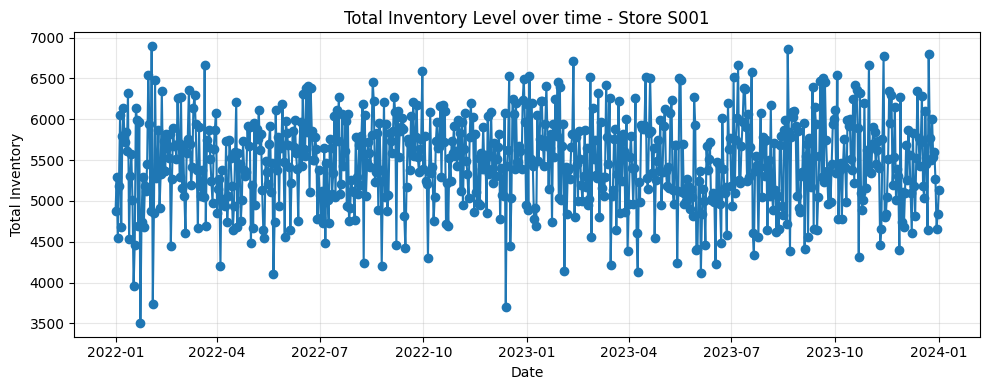

In [9]:
sql = """
SELECT date("Date") AS d, SUM("Inventory Level") AS total_inventory
FROM inventory
WHERE "Store ID" = 'S001'
GROUP BY date("Date")
ORDER BY d ASC

"""
import sqlite3, pandas as pd, matplotlib.pyplot as plt
with sqlite3.connect("inventory.db") as conn:
    df = pd.read_sql_query(sql, conn)

plt.figure(figsize=(10,4))
plt.plot(pd.to_datetime(df["d"]), df["total_inventory"], marker="o")
plt.title("Total Inventory Level over time - Store S001")
plt.xlabel("Date"); plt.ylabel("Total Inventory"); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

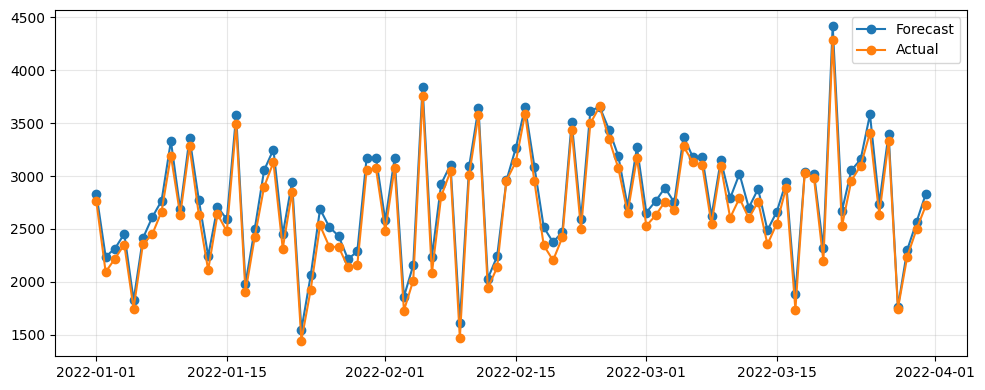

In [16]:
sql = """
SELECT date("Date") AS d,
       SUM("Demand Forecast") AS forecast,
       SUM("Units Sold")      AS sold
FROM inventory
WHERE "Store ID" = 'S001'
  AND date("Date") BETWEEN date('2022-01-01') AND date('2022-03-31')
GROUP BY date("Date")
ORDER BY d ASC;
"""
with sqlite3.connect("inventory.db") as conn:
    df = pd.read_sql_query( sql, conn)
df["d"] = pd.to_datetime(df["d"])
plt.figure(figsize=(10,4))
plt.plot(df["d"], df["forecast"], label="Forecast", marker="o")
plt.plot(df["d"], df["sold"],     label="Actual",   marker="o")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()